In [1]:
# This program uses Convolution Neural Networks(CNN) 
# to classify handwritten digits as numbers 0-9

In [2]:
# import the libraries
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Swetha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load thet data and split it into train and test data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
# get the image shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# take a look at first image (at index=0)in the training data set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# print the image label
y_train[0]

5

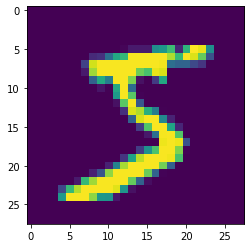

In [7]:
# showing image
plt.imshow(x_train[0])

In [8]:
# reshape the data to fit model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [12]:
# one-hot encoding
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [13]:
# print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# Build the CNN model
model=Sequential()
# add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [18]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
# train the model
hist=model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs=)

Epoch 1/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2473 - accuracy: 0.9517 - val_loss: 0.0906 - val_accuracy: 0.9743
Epoch 2/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0709 - accuracy: 0.9778 - val_loss: 0.0978 - val_accuracy: 0.9720
Epoch 3/3
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.1028 - val_accuracy: 0.9733


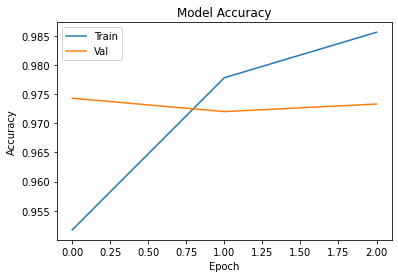

In [23]:
# visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [26]:
# show prediction as probabilites for the first 4 images in the test set 
predictions=model.predict(x_test[:4])
predictions

1/1 [==============================] - 0s 17ms/step


array([[1.1525668e-08, 6.3921997e-12, 4.0248702e-07, 7.4822610e-06,
        2.2171579e-14, 6.3716185e-11, 3.3991231e-15, 9.9999154e-01,
        4.5398806e-07, 1.0048060e-07],
       [5.7160936e-08, 2.2235781e-06, 9.9997306e-01, 1.0726056e-08,
        3.8655541e-09, 6.4805800e-12, 2.4585166e-05, 1.3925694e-10,
        4.9870920e-08, 2.8336039e-15],
       [6.2154083e-07, 9.9984455e-01, 2.2074005e-06, 4.4270863e-09,
        1.1234276e-04, 3.3446453e-05, 1.8630964e-06, 2.8645873e-06,
        1.9736276e-06, 5.3070121e-10],
       [9.9999976e-01, 2.0014144e-13, 1.6084558e-08, 2.1381867e-11,
        1.1211106e-09, 3.2206426e-10, 1.8180492e-07, 8.5184111e-13,
        6.8014132e-09, 3.2013720e-08]], dtype=float32)

In [27]:
# print our predivtions as number labels for the first 4 images
print(np.argmax(predictions,axis=1))

# print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


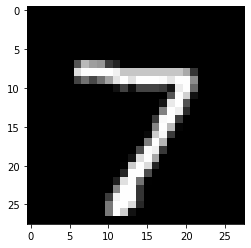

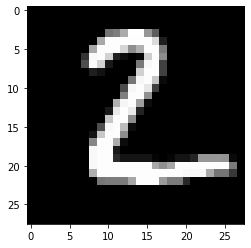

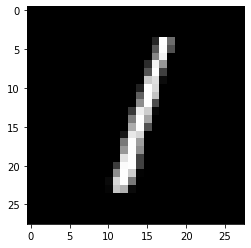

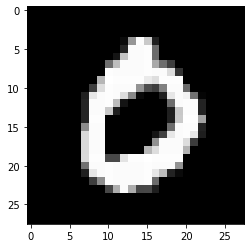

In [29]:
# show first 4 images as pictures
for i in range(0,4):
    image=x_test[i]
    image=np.array(image,dtype='float')
    pixels=image.reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()